In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

2.0.0-beta0
sys.version_info(major=3, minor=7, micro=0, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.16.0
pandas 0.24.2
sklearn 0.21.3
tensorflow 2.0.0-beta0
tensorflow.python.keras.api._v2.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()


In [3]:
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_valid_std = std.fit_transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_train_std = std.transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

In [6]:
def show_images(n_rows,n_cols,x_data,y_data,classnames):
    assert len(x_data) == len(y_data)
    assert n_rows*n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i*n_cols + j
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(classnames[y_data[index]])
    plt.show()
classnames = ['T-shirt','Trouser','pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [7]:
model = keras.models.Sequential()
# input layer
model.add(keras.layers.Flatten(input_shape=[28,28]))
# 全连接层 full connect layer
for i in range(20):
    model.add(keras.layers.Dense(300,activation="selu"))
model.add(keras.layers.AlphaDropout(rate = 0.5))
# 全连接层 full connect layer
model.add(keras.layers.Dense(10,activation="softmax"))
# relu； y = max(0,x)
# softmax: 将向量转换为概率分布
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

W0828 10:49:54.948653  6100 deprecation.py:323] From d:\python\lib\site-packages\tensorflow\python\keras\backend.py:4149: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_5 (Dense)              (None, 300)               9

In [9]:
# 创建保存模型路径
logdir = '.\dnn-dropout-callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "\\fashion_mnist_model.h5")
callbacks = [keras.callbacks.TensorBoard(logdir),
             keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
             keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),]

history = model.fit(x_train_std,y_train,epochs=10,
                    validation_data=(x_valid_std,y_valid),
                    callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 17s 301us/sample - loss: 0.5778 - accuracy: 0.7987 - val_loss: 0.6083 - val_accuracy: 0.8428
Epoch 2/10
55000/55000 [==============================] - 16s 297us/sample - loss: 0.3902 - accuracy: 0.8612 - val_loss: 0.5579 - val_accuracy: 0.8604
Epoch 3/10
55000/55000 [==============================] - 16s 299us/sample - loss: 0.3426 - accuracy: 0.8744 - val_loss: 0.5480 - val_accuracy: 0.8706
Epoch 4/10
55000/55000 [==============================] - 17s 300us/sample - loss: 0.3106 - accuracy: 0.8865 - val_loss: 0.4656 - val_accuracy: 0.8748
Epoch 5/10
55000/55000 [==============================] - 16s 296us/sample - loss: 0.2920 - accuracy: 0.8927 - val_loss: 0.5254 - val_accuracy: 0.8870
Epoch 6/10
55000/55000 [==============================] - 16s 290us/sample - loss: 0.2718 - accuracy: 0.8985 - val_loss: 0.5098 - val_accuracy: 0.8854
Epoch 7/10
55000/55000 [=====================

W0828 10:49:57.448551  6100 callbacks.py:241] Method (on_train_batch_end) is slow compared to the batch update (0.121744). Check your callbacks.


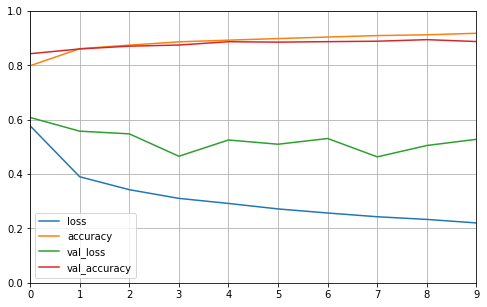

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_test_std = std.fit_transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
model.evaluate(x_test_std,y_test)



10000/10000 [==============================] - 1s 135us/sample - loss: 0.5745 - accuracy: 0.8816


[0.5744872047588229, 0.8816]

In [12]:
logdir = './callbacks'
if not os.path.exists(logdir):
        os.mkdir(logdir)